In [1]:
import pandas as pd
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
import seaborn as sns

In [2]:
# loading data from csv files
fake_df = pd.read_csv("data/Fake.csv")
true_df = pd.read_csv("data/True.csv")
train_df = pd.read_csv("data/fake-news/train.csv")

In [3]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
train_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
fake_df['label'] = 1
true_df['label'] = 0

In [6]:
combine_df = pd.concat([fake_df,true_df])
combine_df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
combine_df = combine_df.drop(["subject","date"],axis=1)
train_df = train_df.drop(["id","author"],axis=1)

In [8]:
full_df = pd.concat([combine_df,train_df])
full_df["full_text"] = full_df["title"].combine_first(full_df["text"])
full_df = full_df.drop(["text","title"],axis=1)
full_df.head()

,label,full_text
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


In [9]:
full_df = full_df.reset_index()

In [11]:
full_df = full_df.drop(["index"],axis=1)

In [12]:
full_df.head()

,label,full_text
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...


## expoloring the dataset
1 means unreliable and
0 means reliable

In [13]:
full_df["label"].value_counts()

1    33894
0    31804
Name: label, dtype: int64

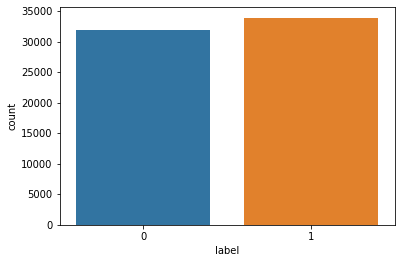

In [14]:
sns.countplot(full_df["label"])

# Tokenization

In [15]:
def tokeniz(text):
    token = re.split('\W+', text)
    return token

full_df["token_text"] = full_df["full_text"].apply(lambda x:tokeniz(x.lower()))
full_df.head()

,label,full_text,token_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne..."
1,1,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r..."
2,1,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern..."
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba..."
4,1,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t..."


# Remove stopwords

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/miro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
stopword = nltk.corpus.stopwords.words('english')

In [18]:
def remove_stopword(token):
    text = [word for word in token if word not in stopword]
    return text

full_df["nostopword_text"] = full_df["token_text"].apply(lambda x:remove_stopword(x))

full_df.head()

,label,full_text,token_text,nostopword_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye..."
1,1,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r..."
2,1,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ..."
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ..."
4,1,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris..."


# Lemmatizing

In [19]:
wl = WordNetLemmatizer()

In [20]:
def lemmatizing(stopword):
    text = [wl.lemmatize(word) for word in stopword]
    return text

full_df["lemmatizing_text"] = full_df["nostopword_text"].apply(lambda x:lemmatizing(x))

full_df.head()

,label,full_text,token_text,nostopword_text,lemmatizing_text
0,1,Donald Trump Sends Out Embarrassing New Year’...,"[, donald, trump, sends, out, embarrassing, ne...","[, donald, trump, sends, embarrassing, new, ye...","[, donald, trump, sends, embarrassing, new, ye..."
1,1,Drunk Bragging Trump Staffer Started Russian ...,"[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r...","[, drunk, bragging, trump, staffer, started, r..."
2,1,Sheriff David Clarke Becomes An Internet Joke...,"[, sheriff, david, clarke, becomes, an, intern...","[, sheriff, david, clarke, becomes, internet, ...","[, sheriff, david, clarke, becomes, internet, ..."
3,1,Trump Is So Obsessed He Even Has Obama’s Name...,"[, trump, is, so, obsessed, he, even, has, oba...","[, trump, obsessed, even, obama, name, coded, ...","[, trump, obsessed, even, obama, name, coded, ..."
4,1,Pope Francis Just Called Out Donald Trump Dur...,"[, pope, francis, just, called, out, donald, t...","[, pope, francis, called, donald, trump, chris...","[, pope, francis, called, donald, trump, chris..."


In [21]:
full_df["lemmatizing_text2"] = [" ".join(x) for x in list(full_df["lemmatizing_text"])]

In [22]:
full_df["lemmatizing_text2"].head()

0     donald trump sends embarrassing new year eve ...
1     drunk bragging trump staffer started russian ...
2     sheriff david clarke becomes internet joke th...
3     trump obsessed even obama name coded website ...
4     pope francis called donald trump christmas sp...
Name: lemmatizing_text2, dtype: object

In [23]:
full_df.to_csv("data/clean_data.csv")

# N-Grams

In [48]:
fake = full_df[(full_df["label"] == 1)]
true = full_df[(full_df["label"] == 0)]

In [49]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [54]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', text)
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [55]:
true_word = basic_clean(''.join(str(true['full_text'].tolist())))

In [56]:
true_bigrams = (pd.Series(nltk.ngrams(true_word, 2)).value_counts())[:20]

In [58]:
bigram_t = pd.DataFrame(true_bigrams).reset_index()
bigram_t = bigram_t.rename(columns={"index":"trueBigram",0:"count"})
bigram_t

,trueBigram,count
0,"(New, York)",6459
1,"(York, Times)",6266
2,"(The, New)",6234
3,"(U, S)",4589
4,"(White, House)",916
5,"(North, Korea)",768
6,"(Donald, Trump)",673
7,"(U, N)",544
8,"(Trump, say)",365
9,"(Islamic, State)",306


In [59]:
true_trigrams = (pd.Series(nltk.ngrams(true_word, 3)).value_counts())[:20]
trigram_t = pd.DataFrame(true_trigrams).reset_index()
trigram_t = trigram_t.rename(columns={"index":"trueTrigram",0:"count"})
trigram_t

,trueTrigram,count
0,"(New, York, Times)",6266
1,"(The, New, York)",6227
2,"(York, Times, Trump)",234
3,"(Briefing, The, New)",203
4,"(say, U, S)",176
5,"(U, S, House)",163
6,"(York, Times, Donald)",163
7,"(Times, Donald, Trump)",162
8,"(U, S, Senate)",154
9,"(York, Times, The)",153


In [60]:
fake_word = basic_clean(''.join(str(fake['full_text'].tolist())))

In [61]:
fake_bigrams = (pd.Series(nltk.ngrams(fake_word, 2)).value_counts())[:20]

In [62]:
fake_trigrams = (pd.Series(nltk.ngrams(fake_word, 3)).value_counts())[:20]

In [63]:
bigram_f = pd.DataFrame(fake_bigrams).reset_index()
bigram_f = bigram_f.rename(columns={"index":"fakeBigram",0:"count"})
bigram_f

,fakeBigram,count
0,"(Donald, Trump)",963
1,"(U, S)",667
2,"(Hillary, Clinton)",644
3,"(President, Trump)",366
4,"(White, House)",359
5,"(In, The)",324
6,"(Of, The)",314
7,"(VIDEO, WATCH)",307
8,"(VIDEO, Trump)",291
9,"(Trump, Is)",284


In [64]:
trigram_f = pd.DataFrame(fake_trigrams).reset_index()
trigram_f = trigram_f.rename(columns={"index":"fakeTrigram",0:"count"})
trigram_f

,fakeTrigram,count
0,"(Black, Lives, Matter)",131
1,"(Boiler, Room, EP)",104
2,"(The, White, House)",80
3,"(The, Onion, America)",79
4,"(Finest, News, Source)",79
5,"(America, Finest, News)",79
6,"(Onion, America, Finest)",79
7,"(World, War, 3)",57
8,"(You, Won, Believe)",57
9,"(Bill, O, Reilly)",53


# WordCloud

In [46]:
def plot_wordcloud(text):
    wordcloud = WordCloud(
        width = 3000,
        height = 2000,
        background_color = 'black').generate(str(text))
    fig = plt.figure(
        figsize = (40, 30),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
#     plt.savefig(f'data/image/{text}.png')

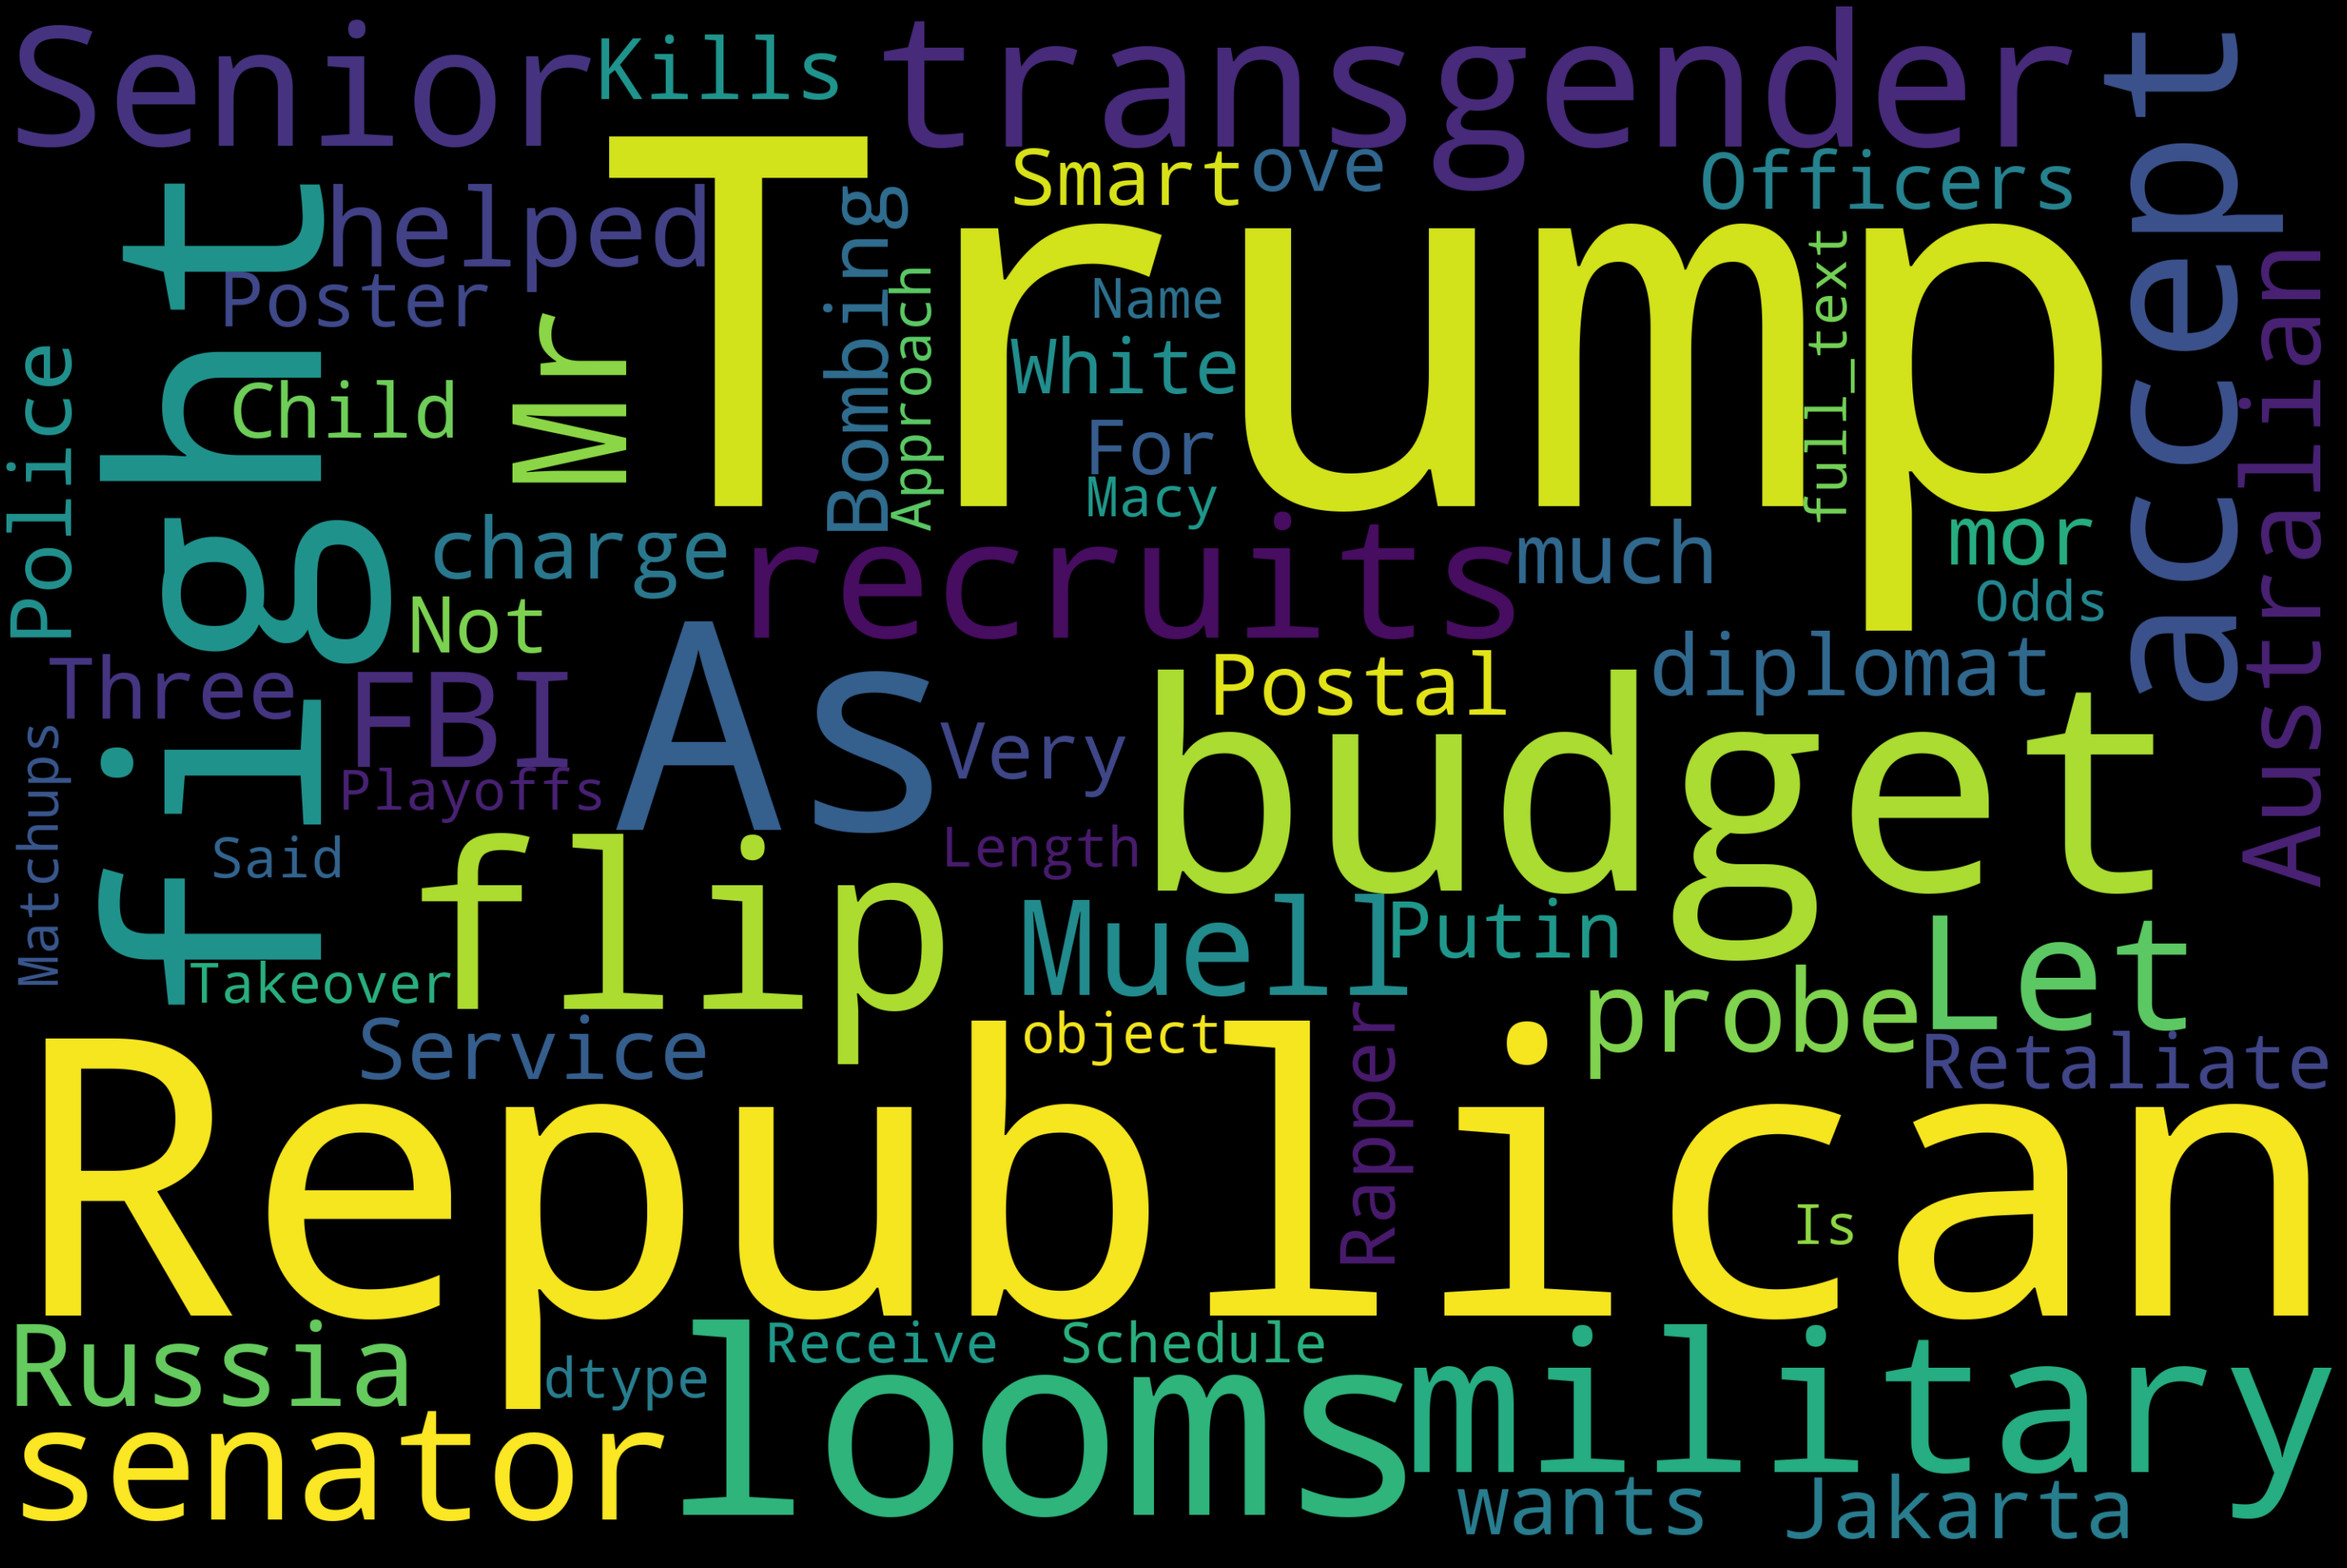

<Figure size 432x288 with 0 Axes>

In [65]:
plot_wordcloud(true["full_text"])
plt.savefig("data/image/true_wordcloud.png")

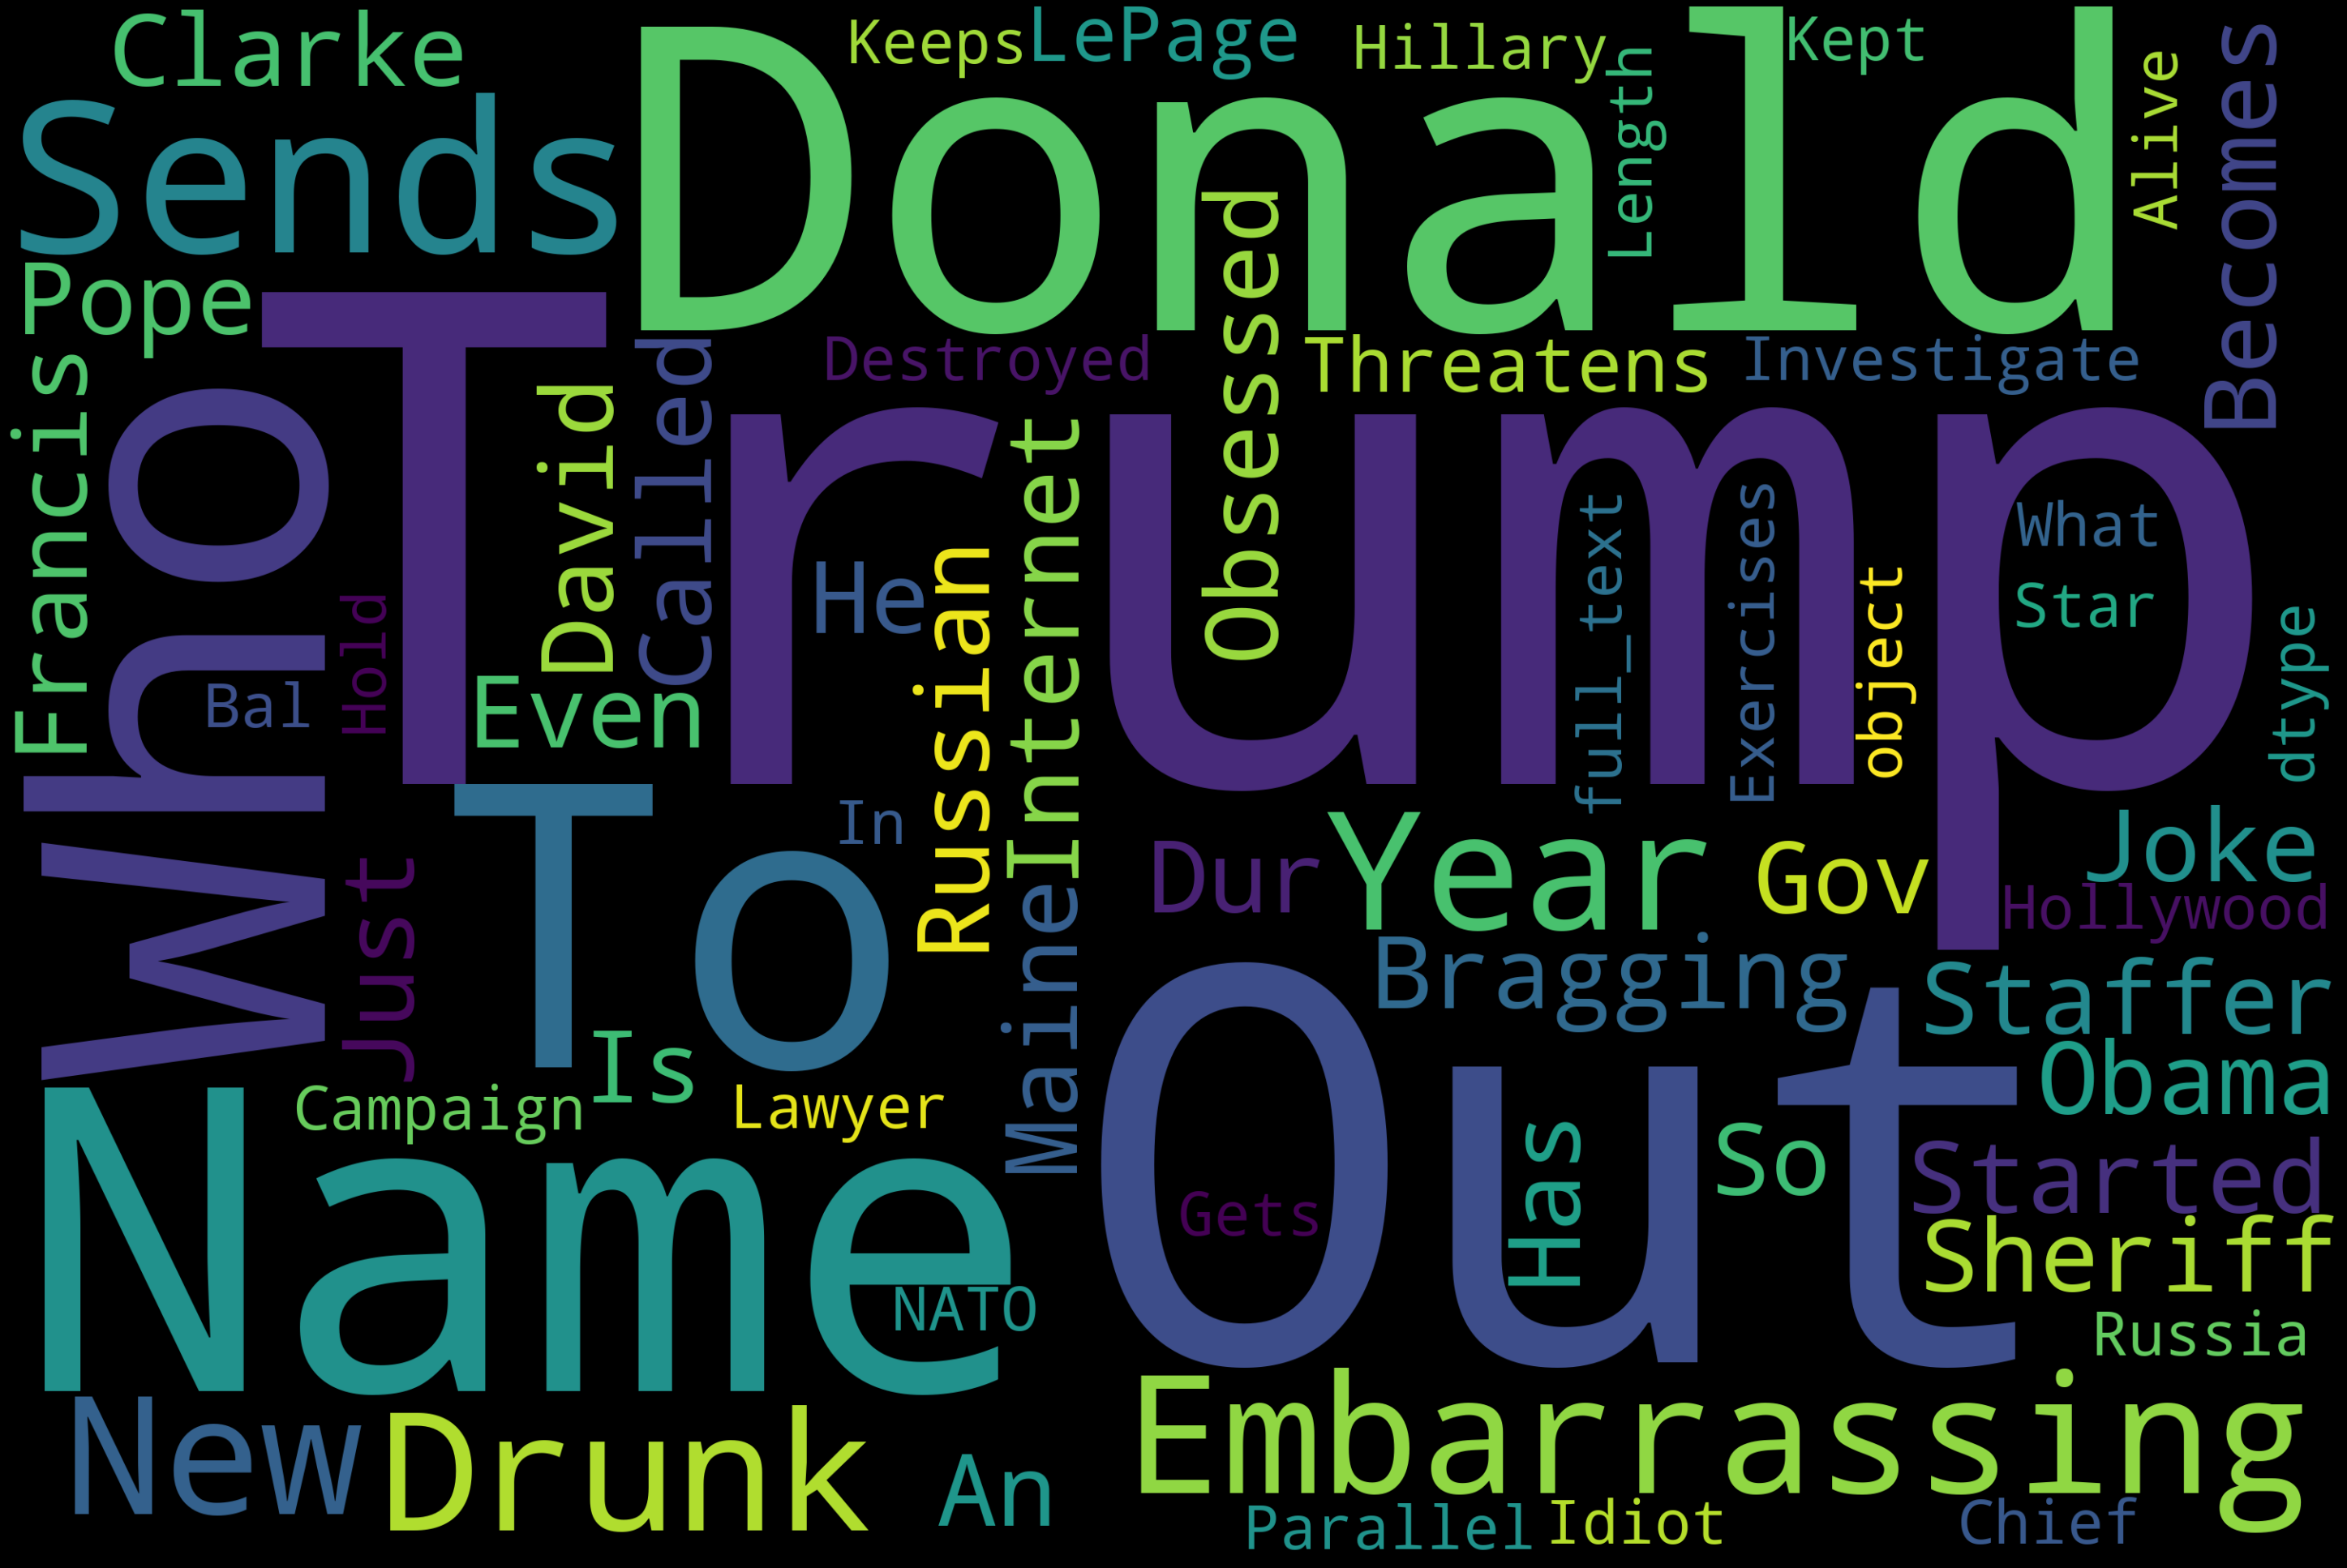

<Figure size 432x288 with 0 Axes>

In [67]:
plot_wordcloud(fake["full_text"])
plt.savefig("data/image/fake_wordcloud.png")

# Neural Networks with Keras

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
data = full_df.values
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(full_df["lemmatizing_text2"])
tfIdf

<65698x27892 sparse matrix of type '<class 'numpy.float64'>'
	with 605842 stored elements in Compressed Sparse Row format>

In [77]:
X = tfIdf
y = data[:, 0]

In [78]:
# from sklearn.preprocessing import LabelEncoder

# label_encoder = LabelEncoder()
# label_encoder.fit(y)
# encoded_y = label_encoder.transform(y)

In [79]:
# encoded_y, y

In [80]:
# from keras.utils import to_categorical

# # Step 2: One-hot encoding
# one_hot_y = to_categorical(encoded_y)
# one_hot_y

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [82]:
from tensorflow.keras.utils import to_categorical
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)
y_train_categorical

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [83]:
from tensorflow.keras.models import Sequential

model = Sequential()
from tensorflow.keras.layers import Dense
number_inputs = 27892
number_hidden_nodes = 4
model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
number_classes = 2
model.add(Dense(units=number_classes, activation='softmax'))

In [84]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 4)                 111572    
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 10        
Total params: 111,582
Trainable params: 111,582
Non-trainable params: 0
_________________________________________________________________


In [85]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Train on 49273 samples
Epoch 1/10
49273/49273 - 20s - loss: 0.3783 - acc: 0.8788
Epoch 2/10
49273/49273 - 26s - loss: 0.1776 - acc: 0.9359
Epoch 3/10
49273/49273 - 25s - loss: 0.1354 - acc: 0.9519
Epoch 4/10
49273/49273 - 24s - loss: 0.1120 - acc: 0.9606
Epoch 5/10
49273/49273 - 28s - loss: 0.0959 - acc: 0.9668
Epoch 6/10
49273/49273 - 24s - loss: 0.0838 - acc: 0.9716
Epoch 7/10
49273/49273 - 31s - loss: 0.0746 - acc: 0.9751
Epoch 8/10
49273/49273 - 29s - loss: 0.0673 - acc: 0.9783
Epoch 9/10
49273/49273 - 25s - loss: 0.0613 - acc: 0.9802
Epoch 10/10
49273/49273 - 26s - loss: 0.0564 - acc: 0.9821


In [87]:
# Evaluate the model using the testing data
model_loss, model_accuracy = model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

16425/16425 - 4s - loss: 0.2997 - acc: 0.9079
Loss: 0.2996951443192803, Accuracy: 0.9079452157020569


In [133]:
model.save("netural_network.h5")

## testing

In [112]:
model.predict_classes(X_test[2])

array([0])

In [111]:
y_test

array([1, 1, 0, ..., 0, 0, 1], dtype=object)

In [124]:
def findClass(new_data):
    wl = WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', new_data)
  # print(words)
    text = []
    for word in words:
        if word not in stopwords:
      # text = wl.lemmatize(word)
            text.append(wl.lemmatize(word))
    new_text = ["".join(x) for x in text]
  # print(new_text)
    new_tfidf = tfIdfVectorizer.transform(new_text)
  # # new_tfidf.sort_indices()
    new_pred = model.predict_classes(new_tfidf)
#     if new_pred[0] == 1:
#         print("This is Fake!")
#     else:
#         print("This is True!")

    return new_pred[0]

In [125]:
findClass(str(full_df['full_text'][39385]))

0

In [191]:
val = "Florida sheriff bans his deputies and office visitors from wearing masks on a day his county broke records for Covid-19 deaths"
findClass(val)

0

In [113]:
full_df['label'][39385]

0

In [120]:
true = true.reset_index()
fake = fake.reset_index()

In [126]:
test_total = 0
for i in range(len(true['full_text'])):
    if findClass(str(true['full_text'][i]))== 0:
        test_total += 1
    else:
        test_total += 0

print(test_total)

18339


In [127]:
test_total/len(true['full_text'])

0.5766255816878381

In [128]:
test_total_1 = 0
for i in range(len(fake['full_text'])):
    if findClass(str(fake['full_text'][i]))== 1:
        test_total_1 += 1
    else:
        test_total_1 += 0

print(test_total)

18339


In [131]:
print(test_total_1)

29398


In [129]:
test_total_1/len(fake['full_text'])

0.8673511535965067

In [130]:
len(fake['full_text'])

33894

In [132]:
len(true['full_text'])

31804

# Deep Learning

In [134]:
deep_model = Sequential()
deep_model.add(Dense(units=number_hidden_nodes,
                activation='relu', input_dim=number_inputs))
deep_model.add(Dense(units=number_hidden_nodes, activation='relu'))
number_classes = 2
deep_model.add(Dense(units=number_classes, activation='softmax'))

In [135]:
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 4)                 111572    
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 10        
Total params: 111,602
Trainable params: 111,602
Non-trainable params: 0
_________________________________________________________________


In [136]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

deep_model.fit(
    X_train,
    y_train_categorical,
    epochs=10,
    shuffle=True,
    verbose=2
)

Train on 49273 samples
Epoch 1/10
49273/49273 - 27s - loss: 0.3884 - acc: 0.8718
Epoch 2/10
49273/49273 - 23s - loss: 0.1722 - acc: 0.9447
Epoch 3/10
49273/49273 - 25s - loss: 0.1239 - acc: 0.9603
Epoch 4/10
49273/49273 - 24s - loss: 0.1000 - acc: 0.9688
Epoch 5/10
49273/49273 - 25s - loss: 0.0833 - acc: 0.9750
Epoch 6/10
49273/49273 - 20s - loss: 0.0716 - acc: 0.9794
Epoch 7/10
49273/49273 - 18s - loss: 0.0627 - acc: 0.9827
Epoch 8/10
49273/49273 - 22s - loss: 0.0554 - acc: 0.9848
Epoch 9/10
49273/49273 - 22s - loss: 0.0496 - acc: 0.9867
Epoch 10/10
49273/49273 - 28s - loss: 0.0446 - acc: 0.9887


In [137]:
deep_model_loss, deep_model_accuracy = deep_model.evaluate(
    X_test, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {deep_model_loss}, Accuracy: {deep_model_accuracy}")

16425/16425 - 4s - loss: 0.3742 - acc: 0.9041
Normal Neural Network - Loss: 0.37421938861704673, Accuracy: 0.9041095972061157


In [138]:
deep_model.save("deep_model.h5")

### testing

In [143]:
def findClass_dl(new_data):
    wl = WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', new_data)
    text = []
    for word in words:
        if word not in stopwords:
      # text = wl.lemmatize(word)
            text.append(wl.lemmatize(word))
    new_text = ["".join(x) for x in text]

    new_tfidf = tfIdfVectorizer.transform(new_text)
    new_pred = deep_model.predict_classes(new_tfidf)
#     if new_pred[0] == 1:
#         print("This is Fake!")
#     else:
#         print("This is True!")

    return new_pred[0]

In [144]:
test_total_2 = 0
for i in range(len(true['full_text'])):
    if findClass_dl(str(true['full_text'][i]))== 0:
        test_total_2 += 1
    else:
        test_total_2 += 0

print(test_total_2)

16520


In [145]:
test_total_2/len(true['full_text'])

0.5194315180480442

In [146]:
test_total_3 = 0
for i in range(len(fake['full_text'])):
    if findClass_dl(str(fake['full_text'][i]))== 1:
        test_total_3 += 1
    else:
        test_total_3 += 0

print(test_total_3)

30246


In [147]:
test_total_3/len(fake['full_text'])

0.8923703310320411

# Naive Bayes

In [149]:
from nltk import classify
from nltk import NaiveBayesClassifier
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
y_train = y_train.astype("int")
y_test = y_test.astype("int")
nb.fit(X_train, np.ravel(y_train))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [150]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
y_pred_nb = nb.predict(X_test)
print("Accuracy is:", metrics.accuracy_score(y_test, y_pred_nb))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_nb)))

Accuracy is: 0.8880365296803653
Mean Squared Error is: 0.3346094295139255


### Confusion Matrix

In [151]:
cm = metrics.confusion_matrix(y_test, y_pred_nb)
print(cm)

[[7000  929]
 [ 910 7586]]


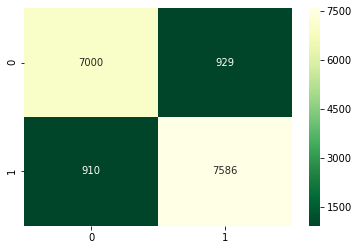

In [152]:
labels =  np.array([cm[0],cm[1]])
sns.heatmap(cm, annot=labels, fmt = '',cmap="YlGn_r")
plt.show()

In [153]:
print(metrics.classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7929
           1       0.89      0.89      0.89      8496

    accuracy                           0.89     16425
   macro avg       0.89      0.89      0.89     16425
weighted avg       0.89      0.89      0.89     16425



In [154]:
y_pred_prob = nb.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob)

0.9554859850808696

# testing

In [171]:
nb.predict(X_test[2])

array([0])

In [172]:
y_test[2]

0

In [174]:
def findClass_nb(new_data):
    wl = WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', new_data)
    text = []
    for word in words:
        if word not in stopwords:
      # text = wl.lemmatize(word)
            text.append(wl.lemmatize(word))
    new_text = ["".join(x) for x in text]

    new_tfidf = tfIdfVectorizer.transform(new_text)
    new_pred = nb.predict(new_tfidf)
#     if new_pred[0] == 1:
#         print("This is Fake!")
#     else:
#         print("This is True!")

    return new_pred[0]

In [190]:
text1 = "saving water is important"
findClass_nb(text1)

0

In [176]:
full_df["label"][0]

1

In [177]:
test_total_4 = 0
for i in range(len(true['full_text'])):
    if findClass_nb(str(true['full_text'][i]))== 0:
        test_total_4 += 1
    else:
        test_total_4 += 0

print(test_total_4)

16439


In [178]:
test_total_4/len(true['full_text'])

0.5168846685951453

In [179]:
test_total_5 = 0
for i in range(len(fake['full_text'])):
    if findClass_nb(str(fake['full_text'][i]))== 1:
        test_total_5 += 1
    else:
        test_total_5 += 0

print(test_total_5)

30360


In [180]:
test_total_5/len(fake['full_text'])

0.8957337581872897

# Logistic Regression

In [155]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [156]:
classifier.fit(X_train, y_train)

/Users/miro/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9425445984616321
Testing Data Score: 0.914703196347032


In [158]:
y_pred_lr = classifier.predict(X_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_lr))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

Accuracy is:  0.914703196347032
Mean Squared Error is: 0.2920561652370448


In [159]:
lr_cm = metrics.confusion_matrix(y_test, y_pred_lr)
print (lr_cm)

[[7159  770]
 [ 631 7865]]


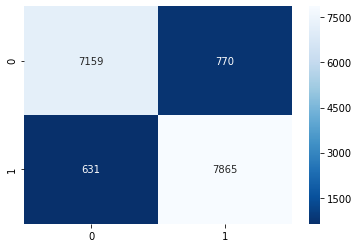

In [160]:
labels = np.array([lr_cm[0],lr_cm[1]])
sns.heatmap(lr_cm, annot=labels, fmt = '',cmap="Blues_r")
plt.show()

In [161]:
print(metrics.classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7929
           1       0.91      0.93      0.92      8496

    accuracy                           0.91     16425
   macro avg       0.91      0.91      0.91     16425
weighted avg       0.91      0.91      0.91     16425



In [162]:
y_pred_prob_lr = classifier.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_lr)

0.9718042887215372

### testing

In [182]:
def findClass_lr(new_data):
    wl = WordNetLemmatizer()
    stopwords= nltk.corpus.stopwords.words('english')
    words = re.split('\W+', new_data)
    text = []
    for word in words:
        if word not in stopwords:
      # text = wl.lemmatize(word)
            text.append(wl.lemmatize(word))
    new_text = ["".join(x) for x in text]

    new_tfidf = tfIdfVectorizer.transform(new_text)
    new_pred = classifier.predict(new_tfidf)

    return new_pred[0]

In [183]:
test_total_6 = 0
for i in range(len(true['full_text'])):
    if findClass_lr(str(true['full_text'][i]))== 0:
        test_total_6 += 1
    else:
        test_total_6 += 0

print(test_total_6)

15601


In [184]:
test_total_6/len(true['full_text'])

0.4905357816626839

In [185]:
test_total_7 = 0
for i in range(len(fake['full_text'])):
    if findClass_lr(str(fake['full_text'][i]))== 1:
        test_total_7 += 1
    else:
        test_total_7 += 0

print(test_total_7)

31036


In [186]:
test_total_7/len(fake['full_text'])

0.9156782911429752

# Random Forest

In [163]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.915007610350076

In [164]:
y_pred_rf = rf.predict(X_test)
print ("Accuracy is: ", metrics.accuracy_score(y_test, y_pred_rf))
print("Mean Squared Error is:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Accuracy is:  0.915007610350076
Mean Squared Error is: 0.2915345428074071


In [165]:
rf_cm = metrics.confusion_matrix(y_test, y_pred_rf)
print (rf_cm)

[[7176  753]
 [ 643 7853]]


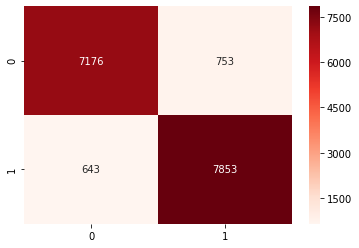

In [166]:
labels = np.array([rf_cm[0],rf_cm[1]])
sns.heatmap(rf_cm, annot=labels, fmt = '',cmap="Reds")
plt.show()

In [167]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7929
           1       0.91      0.92      0.92      8496

    accuracy                           0.92     16425
   macro avg       0.92      0.91      0.91     16425
weighted avg       0.92      0.92      0.91     16425



In [168]:
y_pred_prob_rf = classifier.predict_proba(X_test)[:, 1]
metrics.roc_auc_score(y_test, y_pred_prob_rf)

0.9718042887215372